In [ ]:
%load_ext autoreload
%autoreload 2

In [1]:
from lib import DihedralAdherence
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lib.fit_model_on_multiple import fit_lr, predict_lr, fit_rf, plot_md_vs_rmsd, predict_rf
from pathlib import Path
from lib import DihedralAdherence
from lib import PDBMineQuery
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from pathlib import Path
from scipy.stats import linregress, pearsonr
PDBMINE_URL = os.getenv("GREEN_PDBMINE_URL")
PROJECT_DIR = 'casp_da'

In [56]:
proteins = [
  'T1024', 'T1030', 'T1030-D2', 'T1024-D1', 'T1032-D1', 'T1053-D1', 'T1027-D1', 'T1029-D1',
  'T1025-D1', 'T1028-D1', 'T1030-D1', 'T1053-D2', 'T1057-D1','T1058-D1', 'T1058-D2'
]

# August 2024 - single residue - MLP

In [ ]:
da = DihedralAdherence(
    'T1053-D1', [4,5,6,7], PDBMINE_URL, PROJECT_DIR, mode='ml', quantile=1,
    weights_file='ml_runs/best_model-kde_16-32_383.pt', device='cuda'
)
da.load_results_da()
da.filter_nas(.8)
da.plot_da_vs_gdt_simple()

In [58]:
# proteins = ['T1024', 'T1096', 'T1091', 'T1030', 'T1038', 'T1030-D2', 'T1024-D1', 'T1032-D1', 'T1053-D1', 'T1027-D1', 'T1029-D1']
# proteins = [
#     'T1024', 'T1096', 'T1091', 'T1030', 'T1038', 'T1030-D2', 'T1024-D1', 'T1032-D1', 'T1053-D1', 'T1027-D1', 'T1029-D1',
#     # 'T1025-D1', 'T1028-D1', 'T1030-D1', 'T1053-D2', 'T1057-D1','T1058-D1', 'T1058-D2'
# ]
# proteins = [
#   'T1024', 'T1030', 'T1030-D2', 'T1024-D1', 'T1032-D1', 'T1053-D1', 'T1027-D1', 'T1029-D1',
#   'T1025-D1', 'T1028-D1', 'T1030-D1', 'T1053-D2', 'T1057-D1','T1058-D1', 'T1058-D2'
# ]
# proteins = ['T1030-D2', 'T1024-D1', 'T1053-D1', 'T1057-D1', 'T1058-D1', 'T1058-D2'] # good (af >85 gdt)
# # proteins = ['T1024', 'T1091', 'T1030', 'T1032-D1', 'T1027-D1', 'T1030-D1', 'T1096', 'T1029-D1'] # bad (af <85 gdt)
# # proteins = ['T1096', 'T1029-D1'] # bad (af < 50 gdt)
preds = []
rsquareds = []
pearsonrs = []
n_preds = []
for protein in proteins:
    da = DihedralAdherence(
        protein, [4,5,6,7], PDBMINE_URL, PROJECT_DIR, mode='ml', quantile=1,
        weights_file='ml_runs/best_model-kde_16-32_383.pt', device='cuda'
    )
    da.load_results_da()
    da.filter_nas(.8)
    # af_da = da.grouped_preds.loc[da.grouped_preds.protein_id == da.alphafold_id, 'da'].values[0]
    # da.grouped_preds['da'] = da.grouped_preds['da'] / af_da
    # if not da.alphafold_id in da.protein_ids:
        # continue
    # if da.af_phi_psi is None:
        # continue
    # af_gdt = da.grouped_preds.loc[da.grouped_preds.protein_id == da.alphafold_id, 'GDT_TS'].values[0]
    # af_ave_conf = da.af_phi_psi.conf.mean()
    # da.grouped_preds['da'] = da.grouped_preds['da'] * (af_ave_conf / 100)
    
    preds.append(da.grouped_preds)
    rsquared, corr = da.test_correlation()
    rsquareds.append(rsquared)
    pearsonrs.append(corr)
    n_preds.append(len(da.grouped_preds))

preds = pd.concat(preds)

Initializing T1024 ...
casp_da/T1024_win4-5-6-7
Results already exist
Casp ID: T1024 	PDB: 6t1z
Structure exists: 'pdb/pdb6t1z.ent' 
UniProt ID: Q48658
LinRegr - Slope: -60.412255252826206, Intercept: 130.83913457617282 R-squared: 0.5458478512634988 p-value: 1.8476286322637705e-67
Pearson Correlation: -0.7388151671856084, p-value: 1.847628632264172e-67
Initializing T1030 ...
casp_da/T1030_win4-5-6-7
Results already exist
Casp ID: T1030 	PDB: 6poo
Structure exists: 'pdb/pdb6poo.ent' 
UniProt ID: Q8DWZ6
LinRegr - Slope: -65.01709218965762, Intercept: 128.96223422564475 R-squared: 0.66217298139081 p-value: 1.6735776612483594e-88
Pearson Correlation: -0.81374011907415, p-value: 1.6735776612467853e-88
Initializing T1030-D2 ...
casp_da/T1030-D2_win4-5-6-7
Results already exist
Casp ID: T1030-D2 	PDB: 6poo
Structure exists: 'pdb/pdb6poo.ent' 
UniProt ID: Q8DWZ6
LinRegr - Slope: -58.95338903226688, Intercept: 132.55258082831392 R-squared: 0.4905083023335586 p-value: 3.1945942395717496e-59
Pear

In [ ]:
# preds = preds[preds['target'].isin(['T1024', 'T1096', 'T1030', 'T1038', 'T1030-D2', 'T1024-D1', 'T1032-D1', 'T1053-D1', 'T1027-D1', 'T1029-D1'])]
preds = preds[preds['target'].isin(['T1030-D2', 'T1024-D1', 'T1053-D1', 'T1057-D1', 'T1058-D1', 'T1058-D2'])] # good (af >85 gdt)

0.5474725370084847 PearsonRResult(statistic=-0.7399138713448239, pvalue=0.0)
Slope: -80.32220346083938, Intercept: 179.72923882671012


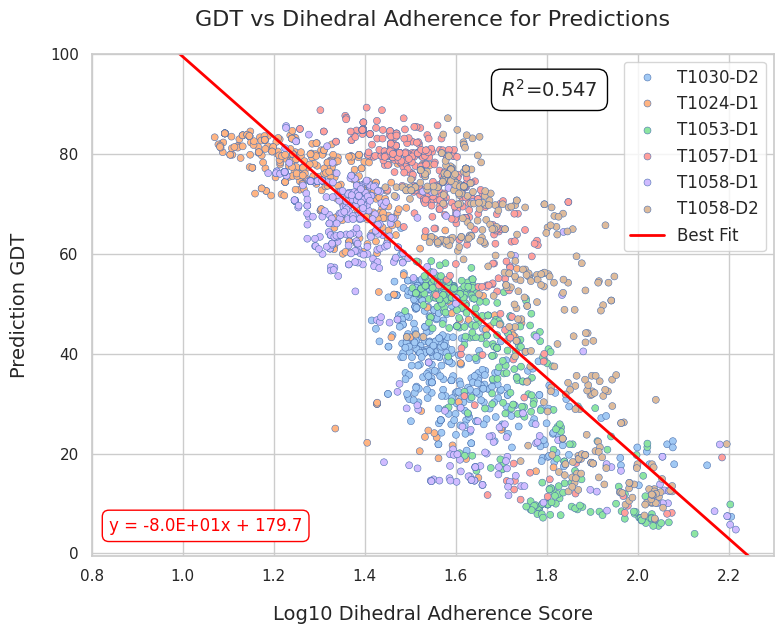

In [55]:
from scipy.stats import pearsonr
sns.set_theme(style="whitegrid")
sns.set_palette("pastel")
fig, ax = plt.subplots(figsize=(8, 6.5))
df = preds.dropna(subset=['da', 'GDT_TS']).reset_index(drop=True)

df['da'] = np.log10(df['da'])
df = df[~df.Model.str.contains('427')]

# df = df[df.GDT_TS < 20]
regr = linregress(df.da, df.GDT_TS)
corr = pearsonr(df['da'], df['GDT_TS'])
print(regr.rvalue**2, corr)
print(f'Slope: {regr.slope}, Intercept: {regr.intercept}')
# sns.kdeplot(data=df, x='da', y='GDT_TS', ax=ax, fill=True, bw_method=0.1)
sns.scatterplot(data=df, x='da', y='GDT_TS', ax=ax, marker='o', s=25, edgecolor='b', legend=True, hue='target', palette='pastel')
# sns.regplot(data=df.reset_index(drop=True), x='da', y='GDT_TS', ax=ax, scatter=False, color='red')
ax.plot(
    np.linspace(0.8, 2.3, 100), 
    regr.intercept + regr.slope * np.linspace(0.8, 2.3, 100), 
    color='red', lw=2, label='Best Fit'
)
ax.set_xlabel('Log10 Dihedral Adherence Score', fontsize=14, labelpad=15)
ax.set_ylabel('Prediction GDT', fontsize=14, labelpad=15)
ax.set_title(r'GDT vs Dihedral Adherence for Predictions', fontsize=16, pad=20)
ax.text(0.6, 0.95, r'$R^2$='+f'{regr.rvalue**2:.3f}', transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
if regr.intercept > 0:
    s = f'y = {regr.slope:.1E}x + {regr.intercept:.1f}'
else:
    s = f'y = {regr.slope:.1E}x - {-regr.intercept:.1f}'
ax.text(.025,.05, s, transform=ax.transAxes, fontsize=12, color='red',
        bbox=dict(boxstyle='round,pad=0.4', edgecolor='red', facecolor='white'))
ax.set_xlim(.8, 2.3)
ax.set_ylim(-0.5, 100)
plt.legend(fontsize=12, loc='upper right')
plt.tight_layout()
plt.show()
sns.reset_defaults()

In [73]:
results = pd.DataFrame({
    'protein': proteins,
    'n_preds': n_preds,
    'rsquared': rsquareds,
    'pearsonr': pearsonrs
})
results.loc[len(results)] = ['Mean', results.rsquared.mean(), results.pearsonr.mean(), results.n_preds.mean()]
results.to_markdown('thisresult.md',index=False)